<a href="https://colab.research.google.com/github/barakhoffer/sky130_ngspice_reram/blob/main/Sky130_ReRAM_Ngspice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install libtool libxaw7-dev bison flex > install_pre.log

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,014 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/u

In [2]:
PDK_HASH = 'fa87f8f4bbcc7255b6f0c0fb506960f531ae2392'
PDK_ROOT = '/root/.volare/volare/sky130/versions'
PDKPATH = f'{PDK_ROOT}/sky130B'
%env PDK_ROOT={PDK_ROOT}
%env PDKPATH={PDKPATH}
!pip install --upgrade --no-cache-dir volare
!volare enable --pdk sky130 {PDK_HASH} > pdk_install.log

env: PDK_ROOT=/root/.volare/volare/sky130/versions
env: PDKPATH=/root/.volare/volare/sky130/versions/sky130B
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 229.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 KB 210.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 KB 238.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 185.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 186.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [3]:
!git clone git://git.code.sf.net/p/ngspice/ngspice
!export PATH=$PATH:/content && cd ngspice && ./compile_linux.sh > ngspice_install.log 2>&1

Cloning into 'ngspice'...
remote: Enumerating objects: 124675, done.
remote: Counting objects: 100% (124675/124675), done.
remote: Compressing objects: 100% (24022/24022), done.
remote: Total 124675 (delta 101684), reused 121608 (delta 99365)
Receiving objects: 100% (124675/124675), 40.59 MiB | 2.03 MiB/s, done.
Resolving deltas: 100% (101684/101684), done.


In [4]:
%%writefile /root/.spiceinit
set num_threads=4
set ngbehavior=hsa
set ng_nomodcheck

Writing /root/.spiceinit


In [5]:
!git clone https://github.com/barakhoffer/sky130_ngspice_reram

Cloning into 'sky130_ngspice_reram'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 3), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), 7.47 KiB | 2.49 MiB/s, done.


In [6]:
!sky130_ngspice_reram/install.sh

--2023-03-13 16:32:09--  https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_2_0_linux_amd64.tar.xz
Resolving openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23753116 (23M) [application/x-xz]
Saving to: ‘openvaf_23_2_0_linux_amd64.tar.xz’

openvaf_23_2_0_linu 100%[===================>]  22.65M  --.-KB/s    in 0.05s   

2023-03-13 16:32:09 (431 MB/s) - ‘openvaf_23_2_0_linux_amd64.tar.xz’ saved [23753116/23753116]

Cloning into 'sky130_fd_pr_reram'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 199 (delta 48), reused 41 (delta 41), pack-reused 136
Receiving objects: 100% (199/199), 3.56 MiB | 35.43 MiB/s, done.
Resolving deltas: 100% 

In [9]:
!pip install spyci

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!ngspice -b -r reram_example.raw $PDK_ROOT/sky130B/libs.tech/ngspice/reram_example.spice


Note: Compatibility modes selected: hs a


Circuit: reram example

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
te                                           0
nfilament                                  3.8
v1#branch                                    0

 Reference value :  1.45245e-06
No. of Data Rows : 15030
ASCII raw file "reram_example.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 6  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
te                                           0
nfilament                                  3.8
v1#branch                                    0


No. of Data Rows : 15030

Total analysis time (seconds) = 2.574

Total elapsed time (seconds) = 2.578 

Total DRAM 

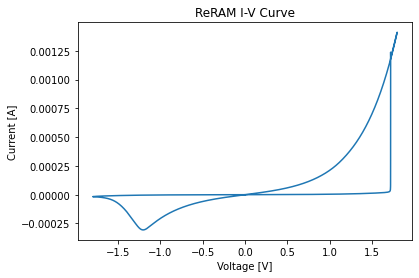

In [11]:
from spyci import spyci
import matplotlib.pyplot as plt

data = spyci.load_raw("reram_example.raw")
plt.plot(data['values']['v(te)'].real, -data['values']['i(v1)'].real)
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.title("ReRAM I-V Curve")
plt.show()